# Car evaluation classification with KNN classifier using scikit learn

In [18]:
import numpy as np
import pandas as pd 
from sklearn import neighbors,metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [21]:
#download data from https://archive.ics.uci.edu/ml/datasets/car+evaluation
data = pd.read_csv('car.data')

In [23]:
data.columns = ["buying","maint","doors","persons","lug_boot","safety","class"]
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [38]:
for i in data.columns:
  print(i)
  print(data[i].value_counts())

buying
med      432
low      432
high     432
vhigh    431
Name: buying, dtype: int64
maint
med      432
low      432
high     432
vhigh    431
Name: maint, dtype: int64
doors
4        432
3        432
5more    432
2        431
Name: doors, dtype: int64
persons
4       576
more    576
2       575
Name: persons, dtype: int64
lug_boot
med      576
big      576
small    575
Name: lug_boot, dtype: int64
safety
med     576
high    576
low     575
Name: safety, dtype: int64
class
unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64


Notice that data is uniformly distributed across each input feature.

In [26]:
X = data[["buying","maint","safety"]].values
y = data[["class"]]

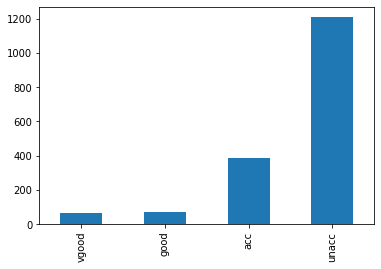

In [46]:
data['class'].value_counts().sort_values().plot(kind = 'bar')

In [27]:
Le = LabelEncoder()
for i in range(len(X[0])):
  X[:,i] = Le.fit_transform(X[:,i])
print(X)

[[3 3 2]
 [3 3 0]
 [3 3 1]
 ...
 [1 1 1]
 [1 1 2]
 [1 1 0]]


In [28]:
label_mapping = {'unacc':0, 'acc': 1, 'good':2,'vgood':3}

In [29]:
y['class'] = y['class'].map(label_mapping)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
y = np.array(y)

In [31]:
print(y)

[[0]
 [0]
 [0]
 ...
 [0]
 [2]
 [3]]


In [35]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 25, weights = 'uniform')
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)
accuracy = metrics.accuracy_score(y_test,predictions)
print("Accuracy on  test data is: ", accuracy)

Accuracy on  test data is:  0.7138728323699421


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [36]:
#saving the model
import joblib
filename = 'car_knn.sav'
joblib.dump(knn,filename)
knn = joblib.load(filename)

With KNN classifier we have achieved 71% accuracy in order to improve accuracy we can try other classifiers like radom forest classifier but in this notebook we just implemented knn classifier.